<a href="https://www.kaggle.com/code/annaelizabeththambi/medicalinsurance?scriptVersionId=116603004" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Linear Regression on Medical Insurance**

![Linear Regression on Medical Insurance Dataset ](https://www.hdfcergo.com/images/default-source/health-insurance/non-medical-expenses-in-health-insurance.jpg) 

# **Introduction**

####  This notebook looks at the costs of medical insurance using a simple Linear regression ML algorithm. the data consists of 1338 entries.

## **About Dataset**
   This Data is a pratical is used in the book **Machine Learning with R** by **Brett Lantz**; which is a book that provides an introduction to machine learning using R. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book. The following data obtained from Kaggle, explain the cost of a small sample of USA population Medical Insurance Cost based on some attributes depicted on "**Columns**".
### **Columns**

    age: age of primary beneficiary

    sex: insurance contractor gender, female, male

    bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
    objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

    children: Number of children covered by health insurance / Number of dependents

    smoker: Smoking

    region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    charges: Individual medical costs billed by health insurance

## **Problem Statement**
    Can you accurately predict insurance costs? 


### **Importing Required Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### **Let's go through our data 👀**

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.shape

(1338, 7)

In [7]:
df.size

9366

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### **Check for any missing data**

In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Since there is no missing values found,we can proceed further...**  

### **Distribution and values of each columns**

#### **1. Charges**

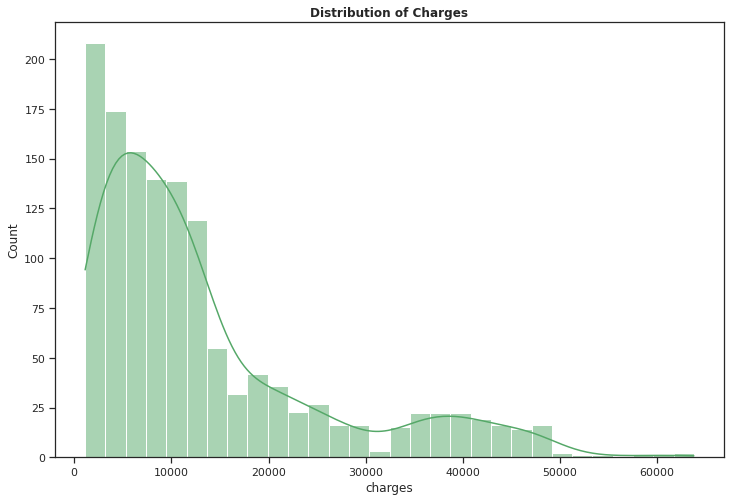

In [10]:
sns.set(style='ticks')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(df['charges'], kde = True, color = 'g')
plt.title('Distribution of Charges',fontweight='bold')
plt.show() 

#### **2. Age**

In [11]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

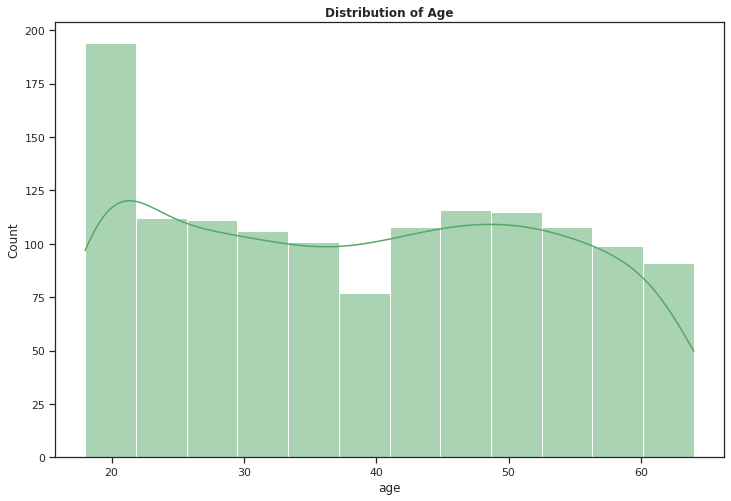

In [12]:
sns.set(style='ticks')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(df['age'], kde = True, color = 'g')
plt.title('Distribution of Age',fontweight='bold')
plt.show() 

#### **3. Sex**

In [13]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [14]:
df['sex'].describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

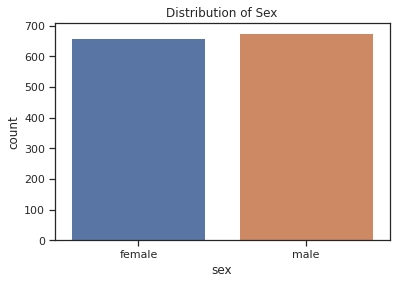

In [15]:
sns.countplot(x="sex", data=df)
plt.title('Distribution of Sex')
plt.show() 

**Since its a categorical data, we need to encode it to numerical values.
We use Label Encoder.**

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
df['sex']= le.fit_transform(df['sex'])

#### **4. BMI**

In [18]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

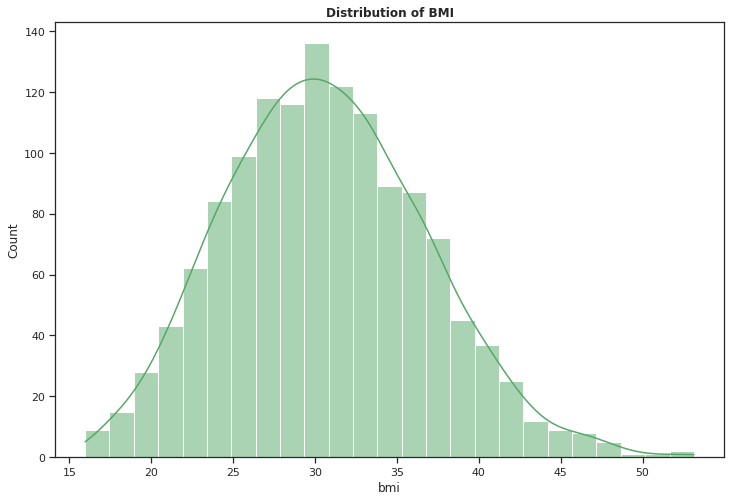

In [19]:
sns.set(style='ticks')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(df['bmi'], kde = True, color = 'g')
plt.title('Distribution of BMI',fontweight='bold')
plt.show() 

**Let's see how BMI affects the insurance charges...**

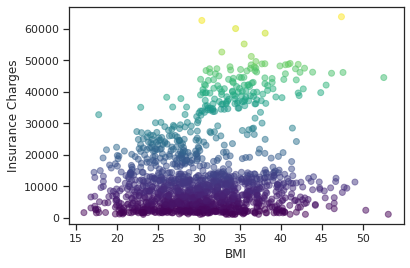

In [20]:
plt.scatter(df['bmi'],df['charges'],c=df['charges'], cmap = "viridis",alpha=0.5)
plt.xlabel("BMI")
plt.ylabel("Insurance Charges")
plt.show()

#### **5. Children**

In [21]:
df['children'].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [22]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

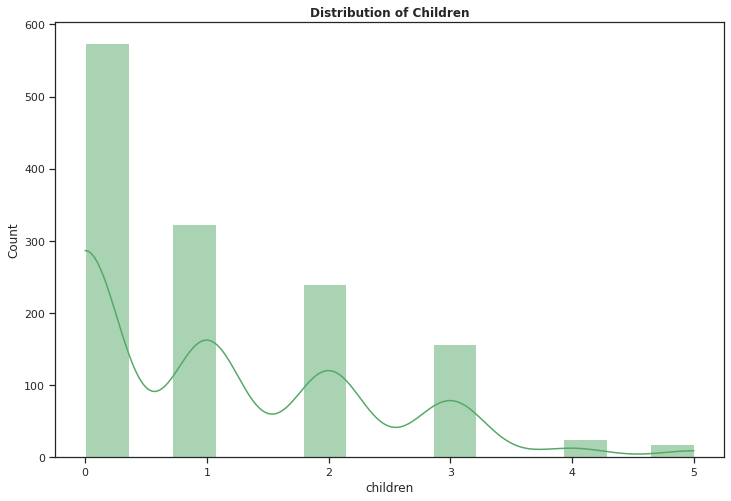

In [23]:
sns.set(style='ticks')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(df['children'], kde = True, color = 'g')
plt.title('Distribution of Children',fontweight='bold')
plt.show() 

#### **6. Smoker**

In [24]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

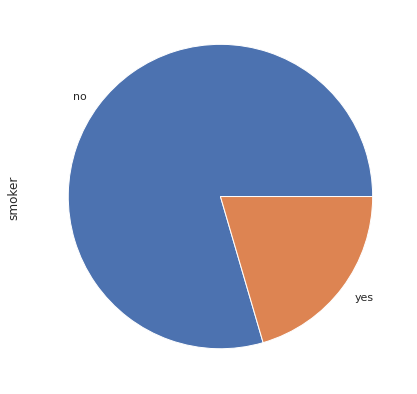

In [25]:
plt.figure(figsize=[9,7])
df['smoker'].value_counts().plot.pie()
plt.show()

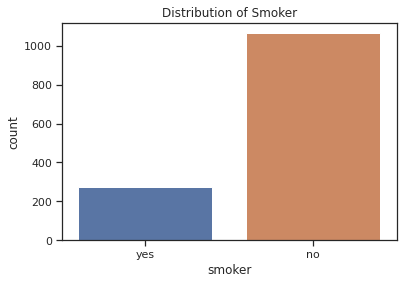

In [26]:
sns.countplot(x="smoker", data=df)
plt.title('Distribution of Smoker')
plt.show() 

**Since its a categorical data,we use Label Encoder.**

In [27]:
df['smoker'] = le.fit_transform(df['smoker'])

#### **7. Regions**

In [28]:
df['region'].describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [29]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

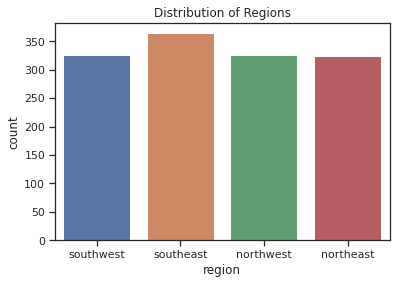

In [30]:
sns.countplot(x="region", data=df)
plt.title('Distribution of Regions')
plt.show() 

**Let's see how different regions affect insurance charges...**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


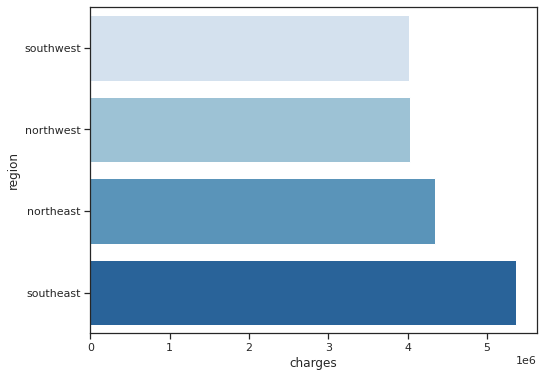

In [31]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')
plt.show()

**Using Label Encoding,**

In [32]:
df['region']= le.fit_transform(df['region'])

##### **Let's print out a correlation matrix..**

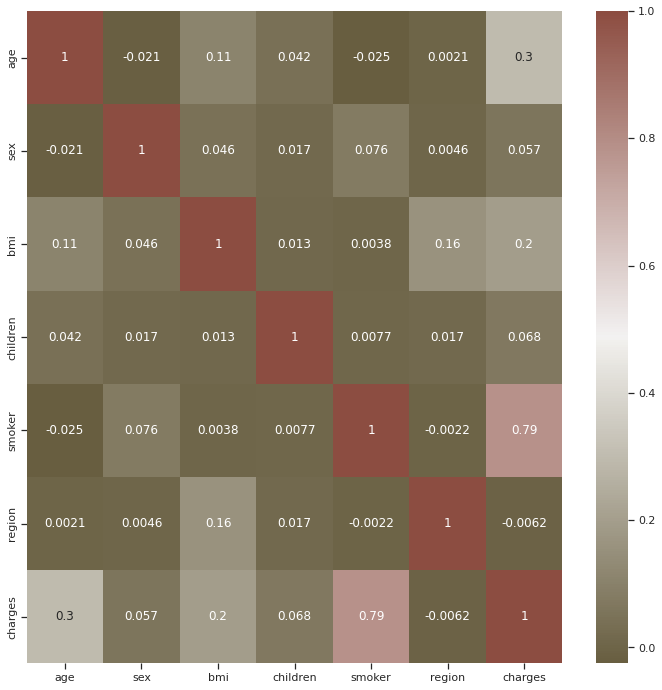

In [33]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= df.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )
plt.show()

### **Let's split up the data to x & y labels.**

In [34]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


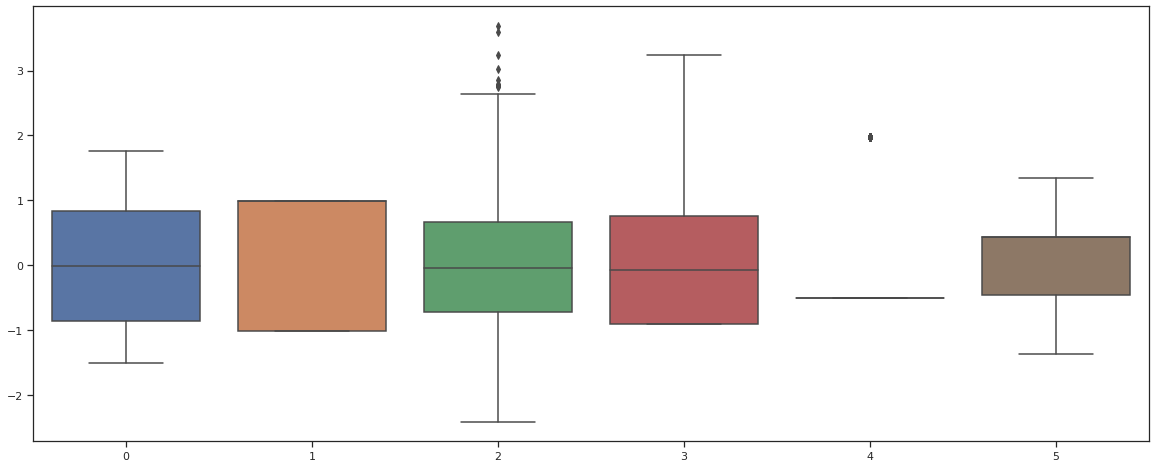

In [35]:
# Normalise the features to use zero mean normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
fig, ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=x, ax=ax)
plt.show()

## **So let's get to business 💀**


### **Creating a linear regresion model**

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([ 4.50048433e+03,  1.28194579e+04,  1.23977127e+04,  1.34303433e+04,
        5.31776110e+02,  3.22642696e+04,  1.30762461e+04,  1.22348298e+04,
        3.82932402e+03,  3.01565286e+04,  1.13198257e+04,  1.72084618e+04,
        8.91832075e+03,  8.22883518e+03,  3.58166904e+03,  1.01918742e+04,
        3.97134424e+03,  6.75521017e+03,  1.52141457e+04,  1.42498228e+04,
        1.24184207e+04,  3.34497470e+04,  9.12417099e+03,  8.85380484e+03,
        3.13406481e+03,  8.14417612e+03,  9.33914668e+03,  1.10793027e+04,
        7.54531559e+03,  4.40537383e+03,  1.39112972e+04,  5.64886526e+03,
        3.46827850e+04,  2.74022377e+04,  3.38105315e+04,  9.52560370e+03,
        3.06087668e+04,  2.67066855e+04,  1.54113111e+04,  3.41398489e+04,
        6.63468968e+03,  1.39736793e+04,  1.08971678e+04,  1.47980620e+04,
        4.09741953e+03,  1.29622798e+04,  4.71597335e+03,  2.92771692e+04,
        7.31791501e+03,  1.39529721e+04,  1.35190763e+04,  1.20798653e+04,
        2.00264361e+03,  

### **Coefficients and Intercepts**

In [38]:
print("Constant/Interept (c):",model.intercept_)

Constant/Interept (c): 13338.997176910943


In [39]:
# list(zip(x,model.coef_))
d = ["age","sex","bmi","region","children","smoker"]
df_ = pd.DataFrame({"Features":d,"Slope":model.coef_})
df_

,Features,Slope
0,age,3541.435268
1,sex,-140.576133
2,bmi,1929.444732
3,region,423.527147
4,children,9702.941545
5,smoker,-351.768404


### **Let's get the actual values and predicted values to a separate dataframe.**

In [40]:
df_ = pd.DataFrame({"Actual Values":y_test,"Predicted Values":y_pred})
df_

,Actual Values,Predicted Values
559,1646.42970,4500.484328
1087,11353.22760,12819.457878
1020,8798.59300,12397.712728
460,10381.47870,13430.343290
802,2103.08000,531.776110
...,...,...
323,11566.30055,16114.773823
1268,1880.48700,3690.989190
134,2457.21115,3217.408995
1274,17043.34140,27310.562222


### **Checking the errors 🔴**

In [41]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred))

Mean Absolute Error : 4139.313074268247


In [42]:
from sklearn.metrics import mean_absolute_percentage_error  # must be a lower  value
print("Mean Absolute Percentage Error :",mean_absolute_percentage_error(y_test,y_pred))

Mean Absolute Percentage Error : 0.41410069696572993


In [43]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error :",mean_squared_error(y_test,y_pred))

Mean Squared Error : 36794223.34351701


In [44]:
import numpy as np
root = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error :",root)

Root Mean Squared Error : 6065.824209744049


In [45]:
from sklearn.metrics import r2_score   # must be always higher value 
print("R^2 Score :",r2_score(y_test,y_pred))

R^2 Score : 0.7403677168975319


🚀 **About Me**

**Hi, I'm Anna! 👋**

**I am an AI Enthusiast and Data science & ML practitioner 💌**